# CO416 - Machine Learning for Imaging

## Coursework 1 - Classification

In this coursework you will be applying the material taught in the course up to and including lecture 4.

$\mathbf{NOTE - \text{READ THIS}:}$ 
- During this coursework you will be asked to comment on the performance of various aspects of the models you develop. The discussion should be done along the following lines:
    - Maximum 100 words of discussion - You are asked to be brief and on point, platitudes and excessive writing will be penalized
    - You should mention effects on accuracy, and computational requirements i.e. time and computational complexities. Empirical arguments are accepted 
    
- When you are asked to change the hyperparamenters, validate the performance of your classifier and explicitly state the optimal hyperparameters you found and their accuracy

## Question 1 (50 Points) 

In this question we will use a toy spiral dataset as generated by the [`make_moons`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) function of sklearn

1) Create a dataset of 1000 points with a noise value of 0.1 and random_state=0 and augment it using polynomial features (recommended degree 10-15) (4 points)

In [1]:
## ADD YOUR CODE HERE
import numpy as np
import struct 
import gzip
import pandas as pd 
import sklearn
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.pyplot as plt

X, y = make_moons(1000, noise=0.1, random_state=0)
poly = sklearn.preprocessing.PolynomialFeatures(degree=10)
X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

print("X shape", X_train.shape)
print("y shape", y_train.shape)

X shape (800, 66)
y shape (800,)


2) Visualize your input data - the first 2 dimensions would suffice  (3 points)



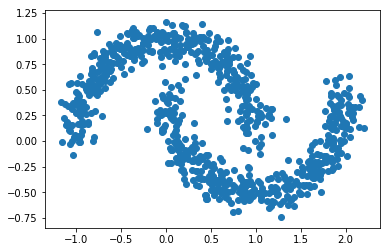

In [2]:
## ADD YOUR CODE HERE
plt.scatter(X_train[:, 1], X_train[:, 2])

3) Use a Decision Tree to classify the data (5 points)



In [3]:
## ADD YOUR CODE HERE
from sklearn import tree
from sklearn.model_selection import cross_val_score
dt_clf = tree.DecisionTreeClassifier(criterion='gini', random_state=0)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

4) Try both Gini Impurity and Information Gain, which performs better? What is the difference between them? (4 points)

In [4]:
## ADD YOUR CODE HERE
criteria = ['gini', 'entropy']
print("CROSS VAL SCORE")
for crit in criteria:
    print(crit, "score")
    dt_clf = tree.DecisionTreeClassifier(criterion=crit, random_state=0)
    print("Accuracies:",cross_val_score(dt_clf, X_train, y_train, cv=5))
    
# OR do it with normal fit and score
print("NORMAL FIT AND SCORE")
for crit in criteria:
    print(crit, "score")
    dt_clf = tree.DecisionTreeClassifier(criterion=crit, random_state=0)
    dt_clf.fit(X_train, y_train)
    print("Accuracy:", dt_clf.score(X_test, y_test))

CROSS VAL SCORE
gini score
Accuracies: [0.9689441  0.9875     0.99375    0.9875     0.97484277]
entropy score
Accuracies: [0.98757764 0.99375    0.9875     0.98125    1.        ]
NORMAL FIT AND SCORE
gini score
Accuracy: 0.985
entropy score
Accuracy: 1.0


5) Perform classification using a tree depth of 1-20. Plot the accuracy versus tree depth. (5 points)



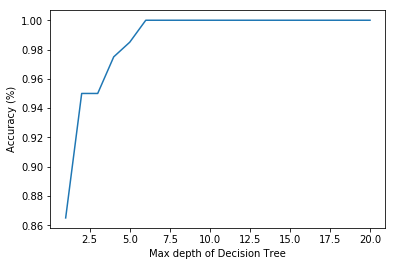

In [5]:
## ADD YOUR CODE HERE
import time
accuracies = []
time_elapsed = []
for i in range(1, 21):
    dt_clf = tree.DecisionTreeClassifier(criterion=crit, max_depth=i, random_state=0)
    start = time.time()
    dt_clf.fit(X_train, y_train)
    end = time.time()
    acc = dt_clf.score(X_test, y_test)
    time_elapsed.append(end - start)
    accuracies.append(acc)
    
plt.plot(range(1,21), accuracies)
plt.xlabel('Max depth of Decision Tree')
plt.ylabel('Accuracy (%)')
plt.show()

6) How does the depth of a tree affect performance and computational burden? (1 points)



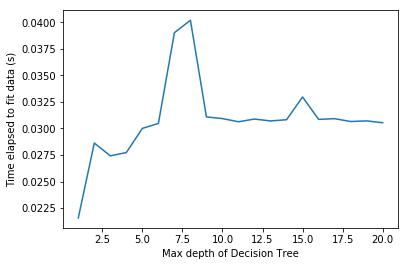

In [6]:
## ADD YOUR CODE HERE
# As depth of a tree increases, the performance is improves up to 
# max depth 6 where we have 100% accuracy.
plt.plot(range(1,21), time_elapsed)
plt.xlabel('Max depth of Decision Tree')
plt.ylabel('Time elapsed to fit data (s)')
plt.show()

# We can see the time elapsed for each max depth of the tree.
# As depth increases, time elapsed increases up to max depth 6
# and then we observe a "stability".

7) Use Bootstrap Classifier to classify your data, base estimator should be a decision tree. Tune hyperparameters of tree depth, n_of estimators, max_samples and bootstrap. Plot accuracy versus different hyperparameters. (7 points)



In [7]:
## ADD YOUR CODE HERE
from mpl_toolkits.mplot3d import Axes3D
from sklearn.ensemble import BaggingClassifier
accuracies = []
d, n, m = [], [], []
# Loop over tree depth
for i in range(6, 21):
    dt_clf2_boot = tree.DecisionTreeClassifier(max_depth=i, random_state=0)
    # n_estimators
    for j in range(1, 11):
        # max_samples
        for k in [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]:
            bag_clf = BaggingClassifier(base_estimator=dt_clf2_boot, n_estimators=j, max_samples=k)
            bag_clf.fit(X_train, y_train)
            acc = bag_clf.score(X_test, y_test)
            accuracies.append(acc)
            d.append(i)
            n.append(j)
            m.append(k)

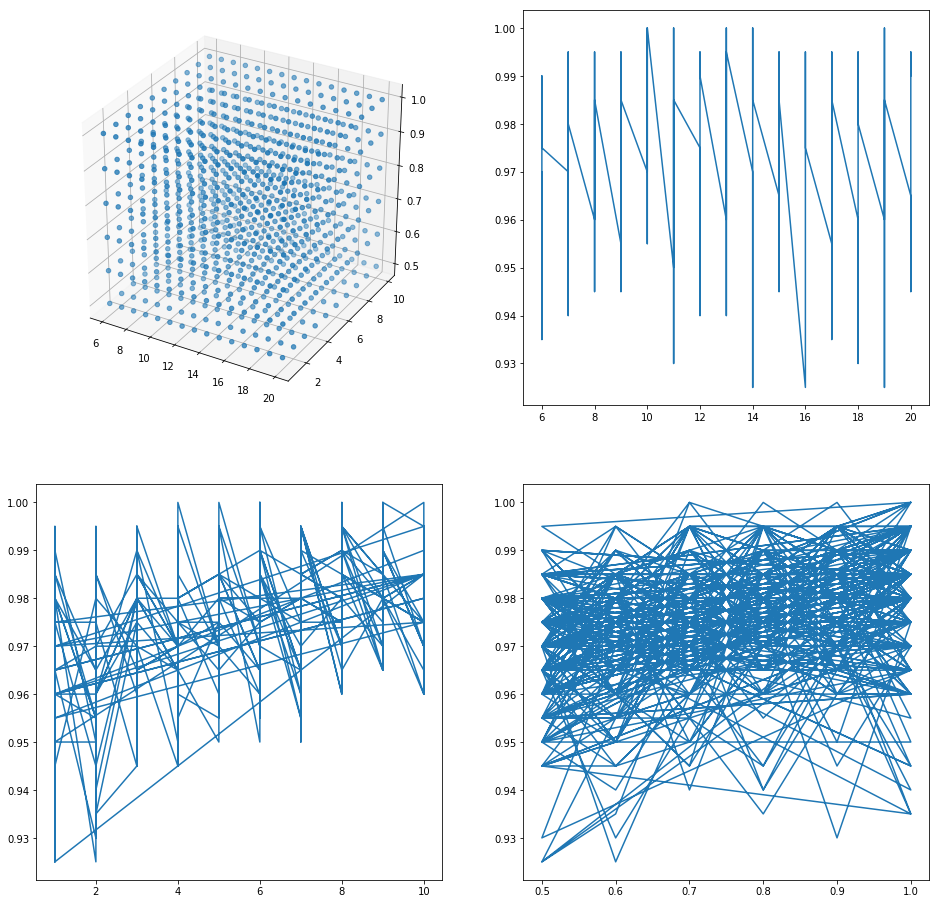

In [8]:
fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(221, projection='3d')
ax.scatter(d, n, m, accuracies, cmap=plt.hot())

ax = fig.add_subplot(222)
ax.plot(d, accuracies)

ax = fig.add_subplot(223)
ax.plot(n, accuracies)

ax = fig.add_subplot(224)
ax.plot(m, accuracies)
plt.show()

8) Why do we use Bootstraping when we create our datasets? Did you use replacement ? Why ? (1 points) 

In [9]:
## ADD YOUR CODE HERE
# We want to get various samples from the dataset such that the model gets some variance and also generalises
# without overfitting

9)  Use a Decision Forest to classify the new dataset (4 points)



In [10]:
## ADD YOUR CODE HERE
from sklearn.ensemble import RandomForestClassifier
criteria = ['gini', 'entropy']
print("CROSS VAL SCORE")
for crit in criteria:
    print(crit, "score")
    dt_clf = RandomForestClassifier(criterion=crit, random_state=0)
    print("Accuracies:",cross_val_score(dt_clf, X_train, y_train, cv=5))
    
# OR do it with normal fit and score
print("NORMAL FIT AND SCORE")
for crit in criteria:
    print(crit, "score")
    dt_clf = RandomForestClassifier(criterion=crit, random_state=0)
    dt_clf.fit(X_train, y_train)
    print("Accuracy:", dt_clf.score(X_test, y_test))


CROSS VAL SCORE
gini score
Accuracies: [0.98136646 0.9875     0.99375    0.96875    0.98742138]
entropy score


/home/kendeas93/anaconda3/envs/mli/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/kendeas93/anaconda3/envs/mli/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/kendeas93/anaconda3/envs/mli/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/kendeas93/anaconda3/envs/mli/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarni

Accuracies: [0.98757764 0.99375    0.99375    0.975      0.98742138]
NORMAL FIT AND SCORE
gini score
Accuracy: 0.995
entropy score
Accuracy: 1.0


/home/kendeas93/anaconda3/envs/mli/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/kendeas93/anaconda3/envs/mli/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/kendeas93/anaconda3/envs/mli/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/kendeas93/anaconda3/envs/mli/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarni

10) Modulate the number of trees to 1-99 with a step of 10. Plot accuracy versus number of trees. (4 points)



Number of trees yielding 100% accuracy: [11, 21, 31, 41, 51, 61, 71, 81, 91, 99]


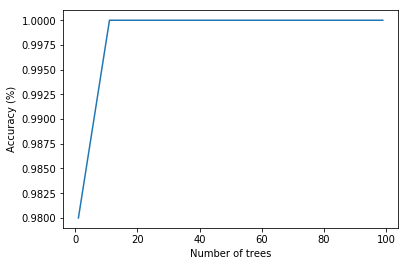

In [16]:
## ADD YOUR CODE HERE
n_trees = [1, 11, 21, 31,41,51,61,71,81,91,99]
accuracies = []
full_acc_trees = []
for n in n_trees:
    rf_cl = RandomForestClassifier(n_estimators=n, criterion='entropy', random_state=0)
    rf_cl.fit(X_train, y_train)
    acc = rf_cl.score(X_test, y_test)
    accuracies.append(acc)
    if acc == 1.0:
        full_acc_trees.append(n)

print("Number of trees yielding 100% accuracy:", full_acc_trees)
plt.plot(n_trees, accuracies)
plt.xlabel('Number of trees')
plt.ylabel('Accuracy (%)')
plt.show()

11) Modulate the depth of  the trees from 1 to 20 - use best number of trees from above. Plot the accuracy versus depth. (4 points)



Number of trees yielding 100% accuracy: [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


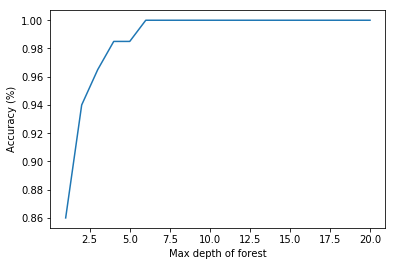

In [24]:
## ADD YOUR CODE HERE
accuracies = []
full_acc_trees = []
for n in range(1,21):
    rf_cl = RandomForestClassifier(n_estimators=21, criterion='entropy', max_depth=n, random_state=0)
    rf_cl.fit(X_train, y_train)
    acc = rf_cl.score(X_test, y_test)
    accuracies.append(acc)
    if acc == 1.0:
        full_acc_trees.append(n)

print("Number of trees yielding 100% accuracy:", full_acc_trees)
plt.plot(range(1,21), accuracies)
plt.xlabel('Max depth of forest')
plt.ylabel('Accuracy (%)')
plt.show()

12) Comment on the performance change while you modulate depth of trees and number of trees (3 points)

In [25]:
## ADD YOUR CODE HERE
# Tested 11 trees which needed depth 7 to reach 100% accuracy. 
# 21 trees reach 100% with depth 6 as well.

13) Visualise how the classification split is done in relation to the data both for Decision Tree and Decision Forest (3 points)

In [33]:
## ADD YOUR CODE HERE

rf_cl = RandomForestClassifier(n_estimators=21, criterion='entropy', max_depth=6, random_state=0)
dt_cl = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)

rf_cl = rf_cl.fit(X_train, y_train)
dt_cl = dt_cl.fit(X_train, y_train)

tree.export_graphviz(dt_cl, out_file='dt_cl.dot')

count = 0
for dt in rf_cl.estimators_:
    tree.export_graphviz(dt, out_file='dtree'+ str(count) +'.dot')
    count += 1


## Question 2 (50 Points)
In this question we will be using the fashion-MNIST dataset for image classification. 

If you are interested, you may find relevant information regarding the dataset in this paper:
Fashion-MNIST: A novel image dataset for benchmarking machine learning algorithms. Han Xiao, Kashif Rasul, Roland Vollgraf. [arXiv:1708.07747](https://arxiv.org/abs/1708.07747)

The data is provided under `/vol/lab/course/416/data/fashion`. The dataset is already split into a set of 60,000 training images and a set of 10,000 test images. The images are of size 28x28 pixels and stored as 784-dimensional vector. So if you would like to visualise the images, you need to reshape the array.

There are in total 10 classes, which are labelled as follows:
0. T-shirt/top
1. Trousers
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle boot

**Your tasks are** (all tasks carry equal marks):
- Use a Decision Forest to classify t-shirts and ankle boots - tune your forest!
- Train and compare an Adaboost classifier with a decision tree 
- Modulate the number of trees in the Adaboost and the depth of the trees. Comment on the performance and complexity 
- Train a Decsiion Forest for all classes and also compare the performance with another ensemble algorithm of your choice
- What is the theoretical difference between Random Forests and Adaboost classifiers? (100 words max)

In [ ]:
# load the data
import numpy as np
import pandas as pd

data_dir = '/vol/lab/course/416/data/fashion/'

df_train = pd.read_csv(data_dir + 'fashion_mnist_train.csv')
df_test = pd.read_csv(data_dir + 'fashion_mnist_test.csv')

x_train = df_train.drop('label', axis=1).as_matrix().astype(np.uint8)
y_train = df_train['label'].as_matrix().astype(np.uint8)
x_test = df_test.drop('label', axis=1).as_matrix().astype(np.uint8)
y_test = df_test['label'].as_matrix().astype(np.uint8)

In [ ]:
## ADD YOUR CODE HERE